## Nick Murphy
## nmurph03

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [2]:
import os
import numpy as np
import pandas as pd
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [3]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

OSError: data_abalone/x_train.csv not found.

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
start_time_sec = time.time()
LBFGS_RELU_loss = []
LBFSG_RELU_res = []
for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    LBFGS_RELU_loss.append(mlp_lbfgs.loss_curve_)
    LBFSG_RELU_res.append(mlp_lbfgs)

finished LBFGS run  0/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.1 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  2/16 after    0.1 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.1 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.1 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  6/16 after    0.1 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.2 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  8/16 after    0.2 sec |  15 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.2 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 10/16 after    0.2 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.3 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

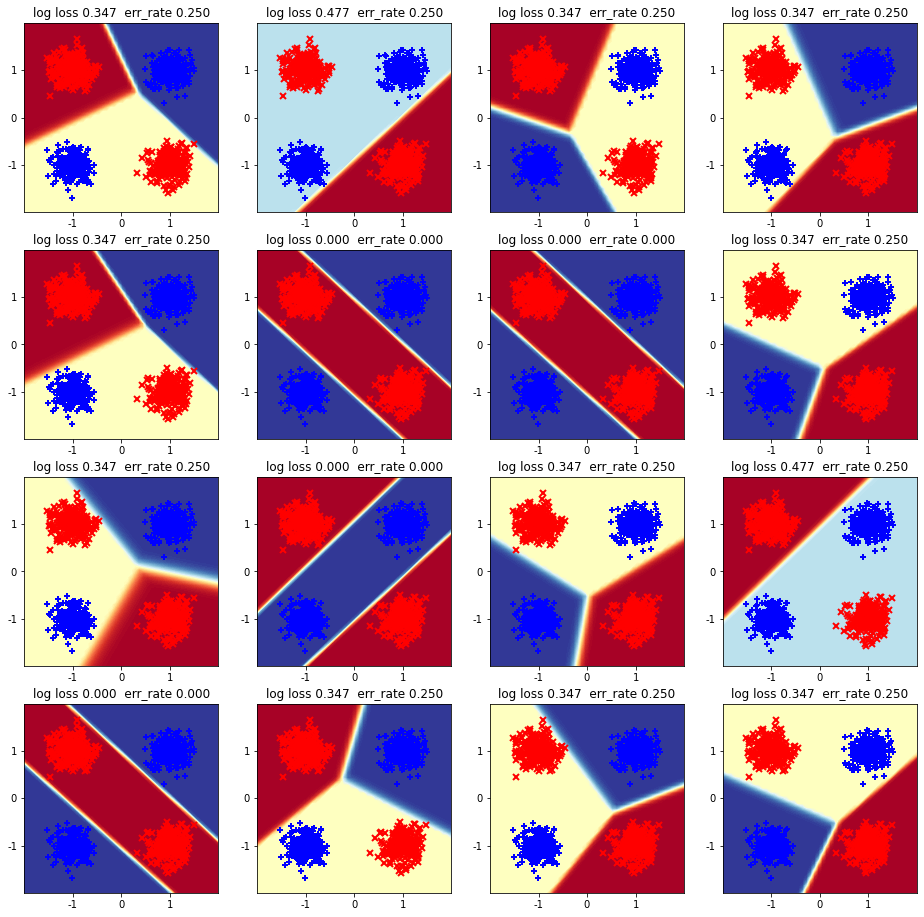

In [24]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

LBFGS_RELU_vals = [i for i in range(n_runs)]
LBFGS_RELU_vals = np.array(LBFGS_RELU_vals).reshape(4,4)
for x in range(4):
    for y in range(4):
        plot_pretty_probabilities_for_clf(LBFSG_RELU_res[LBFGS_RELU_vals[x][y]], x_tr_N2, y_tr_N, ax=ax_grid[x,y])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: Since 4 models reach 0 training error, that is 4/16 = 25% of models reaching 0 training error. All of the others have an error of 0.250 The RELU and L-BFGS models seem to converge pretty rapidly, as the highest number of iterations was 39 and the lowest was 15. 

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation
# Save each run's trained classifier object in a list
n_runs = 16
start_time_sec = time.time()
LBFGS_log_loss = []
LBFSG_log_res = []
for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS logistic run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    LBFGS_log_loss.append(mlp_lbfgs.loss_curve_)
    LBFSG_log_res.append(mlp_lbfgs)

finished LBFGS logistic run  0/16 after    0.1 sec |  58 iters | converged    | loss 0.000
finished LBFGS logistic run  1/16 after    0.1 sec | 116 iters | converged    | loss 0.347
finished LBFGS logistic run  2/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS logistic run  3/16 after    0.2 sec |  71 iters | converged    | loss 0.000
finished LBFGS logistic run  4/16 after    0.2 sec |  40 iters | converged    | loss 0.477
finished LBFGS logistic run  5/16 after    0.2 sec |  42 iters | converged    | loss 0.000
finished LBFGS logistic run  6/16 after    0.2 sec |  50 iters | converged    | loss 0.000
finished LBFGS logistic run  7/16 after    0.3 sec |  42 iters | converged    | loss 0.477
finished LBFGS logistic run  8/16 after    0.3 sec |  62 iters | converged    | loss 0.347
finished LBFGS logistic run  9/16 after    0.4 sec | 134 iters | converged    | loss 0.347
finished LBFGS logistic run 10/16 after    0.4 sec |  92 iters | converged    | loss 0.347

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

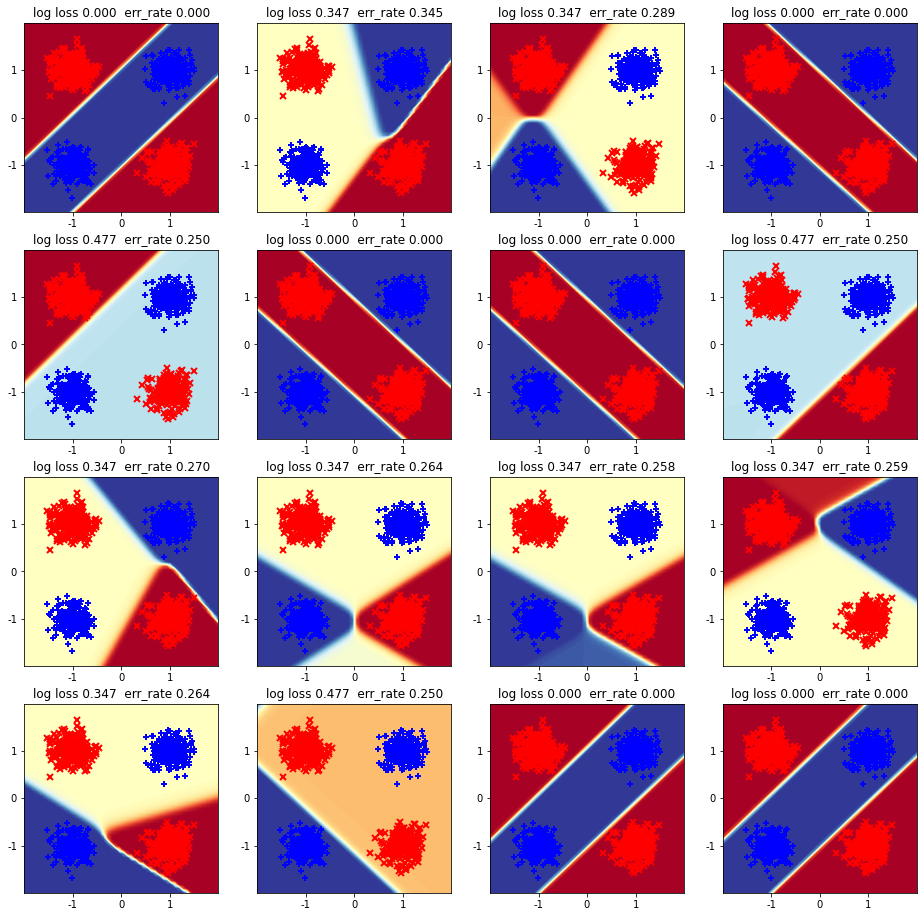

In [25]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
LBFGS_log_vals = [i for i in range(n_runs)]
LBFGS_log_vals = np.array(LBFGS_log_vals).reshape(4,4)
for x in range(4):
    for y in range(4):
        plot_pretty_probabilities_for_clf(LBFSG_log_res[LBFGS_log_vals[x][y]], x_tr_N2, y_tr_N, ax=ax_grid[x,y])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 6 of the 16 models reached 0 training error, while the other models had errors between 0.250 and 0.350. This means 37.5% of models reached 0 training error. These models took much longer to converge, with the lowest number of iterations being 33 and the highest being 134. This is much slower than the ReLU and BFGS models. 

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
start_time_sec = time.time()
SGD_RELU_loss = []
SGD_RELU_res = []
for i in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    SGD_RELU_loss.append(mlp_sgd.loss_curve_)
    SGD_RELU_res.append(mlp_sgd)

finished SGD run  0/16 after    6.4 sec | 267 epochs | converged     | loss 0.347
finished SGD run  1/16 after   14.0 sec | 307 epochs | converged     | loss 0.478
finished SGD run  2/16 after   20.0 sec | 239 epochs | converged     | loss 0.347
finished SGD run  3/16 after   29.9 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  4/16 after   36.8 sec | 275 epochs | converged     | loss 0.347
finished SGD run  5/16 after   46.8 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  6/16 after   56.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   63.5 sec | 273 epochs | converged     | loss 0.347
finished SGD run  8/16 after   68.8 sec | 219 epochs | converged     | loss 0.347
finished SGD run  9/16 after   78.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 10/16 after   87.4 sec | 394 epochs | converged     | loss 0.478
finished SGD run 11/16 after   96.6 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

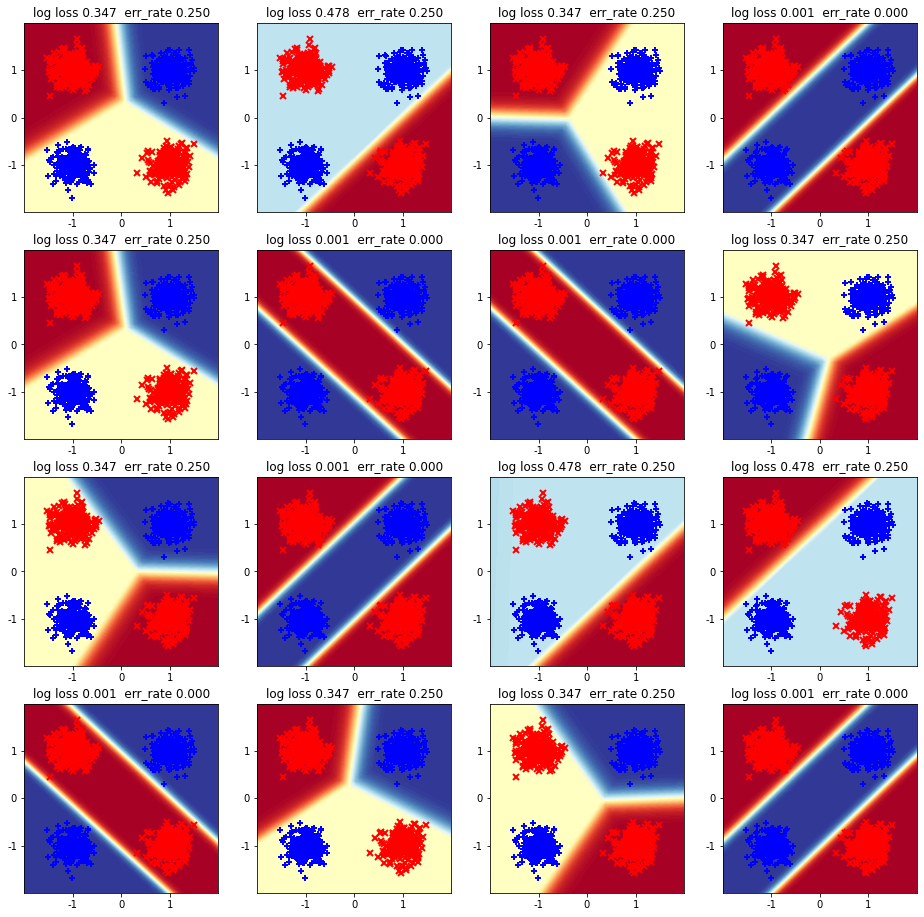

In [26]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
SGD_RELU_vals = [i for i in range(n_runs)]
SGD_RELU_vals = np.array(SGD_RELU_vals).reshape(4,4)
for x in range(4):
    for y in range(4):
        plot_pretty_probabilities_for_clf(SGD_RELU_res[SGD_RELU_vals[x][y]], x_tr_N2, y_tr_N, ax=ax_grid[x,y])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 6 of the 16 models reached 0 training error, while the other models had errors of 0.250. This means 37.5% of models reached 0 training error, while 62.5% of models had 0.25 training error. While 7/16 models didn't converge, the ones that did required an average of 286.56 epochs. This is significantly slower than the models above. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The models that use SGD had a higher percent with 0 training error, 37.5%, compared to L-BFGS, 25%. Moreover, the SGD models took significantly longer than L-BFGS, while also converging a smaller percentage of the time. This makes sense because L-BFGS uses both the first and second derivatives, while SGD only uses the first, allowing L-BFGS to converge more of the time.      

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
n_runs = 16
SGD_log_res = []
SGD_log_loss = []
start_time_sec = time.time()
for i in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    SGD_log_loss.append(mlp_sgd.loss_curve_)
    SGD_log_res.append(mlp_sgd)
    

finished SGD run  0/16 after    3.4 sec | 161 epochs | converged     | loss 0.693
finished SGD run  1/16 after   11.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  2/16 after   20.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   24.4 sec | 215 epochs | converged     | loss 0.693
finished SGD run  4/16 after   32.7 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  5/16 after   41.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  6/16 after   49.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   57.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  8/16 after   66.1 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   74.4 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   77.0 sec | 124 epochs | converged     | loss 0.693
finished SGD run 11/16 after   85.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

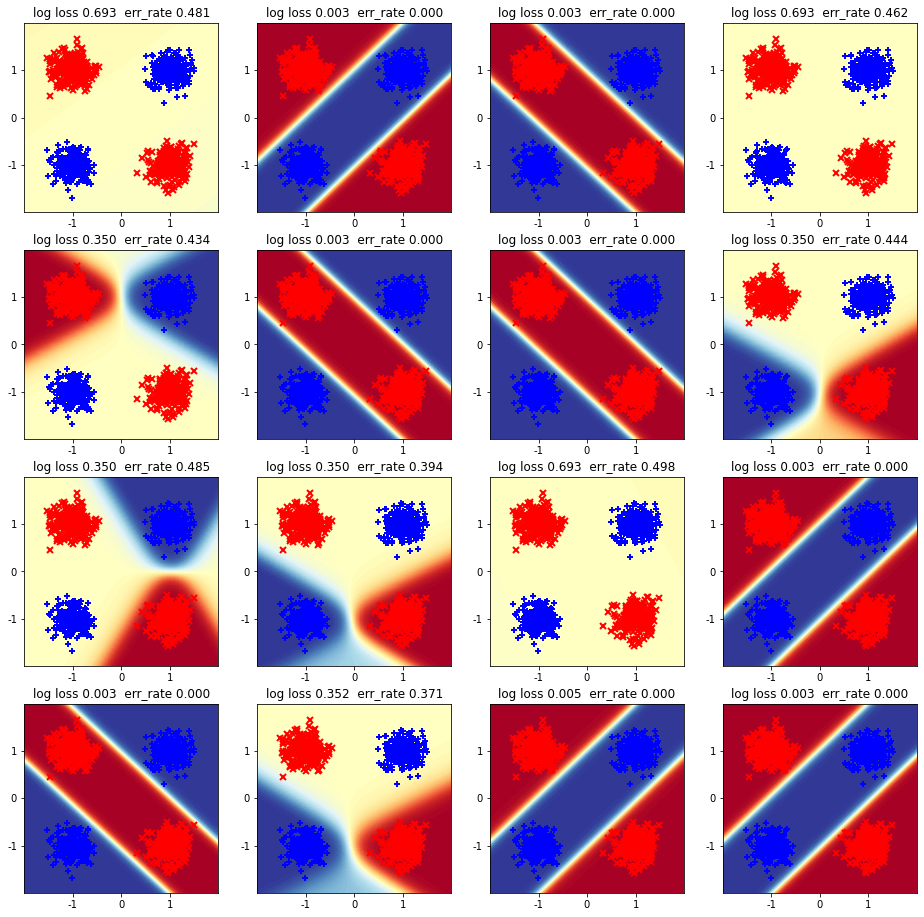

In [27]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
SGD_log_vals = [i for i in range(n_runs)]
SGD_log_vals = np.array(SGD_log_vals).reshape(4,4)
for x in range(4):
    for y in range(4):
        plot_pretty_probabilities_for_clf(SGD_log_res[SGD_log_vals[x][y]], x_tr_N2, y_tr_N, ax=ax_grid[x,y])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 8 of the 16 classifiers reached 0 training error, while the other classifiers had errors from 0.350 to 0.498. This means 50% of classifiers reached 0 training error, while 50% of classifiers had 0.5 training error. While 13/16 classifiers didn't converge, the ones that did required an average of 178.33 epochs.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: The models produced with Logistic activation and SGD had a higher number and percent of models that reached 0 training error, 50%, than the previous L-BFGS from part 2, which had 37.5% of models reach 0 training error. However, the models produced in this section took much longer, as well as converged significantly less than in part 2. This could be because the SGD uses the first derivative, while the L-BFGS uses both the first and second derivatives. 

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

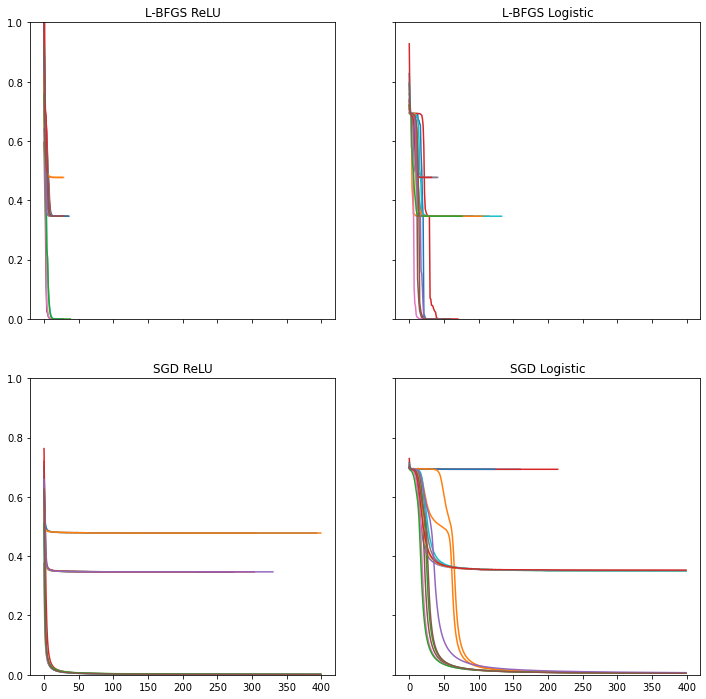

In [28]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,12))
# TODO plot 16 curves for each of the 2x2 settings of solver and activation
for x in range(16):
    ax_grid[0,0].plot(LBFGS_RELU_loss[x])
    ax_grid[0,1].plot(LBFGS_log_loss[x])
    ax_grid[1,0].plot(SGD_RELU_loss[x])
    ax_grid[1,1].plot(SGD_log_loss[x])
    
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** Because the ReLU activation functions loss curves drop to 0 earlier than that of Logistic Sigmoid, it appears easier to optimize. SGD with the Logistic Sigmoid activation function takes the most iterations.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: These experiments have not convinced me that the ReLU activation function is easier to optimize because we used one data set to test. To further compare these activation functions, we could first use different data sets to test that the conclusions made during these experiments hold with other data sets. Another way to compare these activation functions is to use different solvers, such as the default adam solver. Further, changing the parameters of the MLPClassifier function could be informative on the different performances of these activation functions under differing parameters. 